In [8]:
%pip install scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.0 MB 1.5 MB/s eta 0:00:08
    --------------------------------------- 0.1/11.0 MB 1.7 MB/s eta 0:00:07
    --------------------------------------- 0.3/11.0 MB 2.0 MB/s eta 0:00:06
   - -------------------------------------- 0.3/11.0 MB 2.0 MB/s eta 0:00:06
   - -------------------------------------- 0.4/11.0 MB 2.1 MB/s eta 0:00:06
   - -------------------------------------- 0.5/11.0 MB 2.1 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/11.0 MB 2.4 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/11.0 MB 2.7 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/11.0 MB 2.9 MB/s eta 0:00:04
   --- ------------------------------------ 1.1/11.0 MB 2.8 MB/s eta 0:00:04
   ---- ----------------------------------- 1.2/11.0 MB 2.9 MB/s eta 0:00:04
   ----- ----


[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Загрузка данных
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

data = data.drop(columns=['deck', 'embark_town', 'alive', 'who'])

# Заполнение пропущенных значений для числовых столбцов
numeric_features = ['age', 'fare']
numeric_imputer = SimpleImputer(strategy='most_frequent')
data[numeric_features] = numeric_imputer.fit_transform(data[numeric_features])

# Заполнение пропущенных значений для категориальных столбцов
categorical_features = ['embarked']
categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_features] = categorical_imputer.fit_transform(data[categorical_features])

In [6]:
data = pd.get_dummies(data, columns=['sex', 'embarked'], drop_first=True)
data.head()

,survived,pclass,age,sibsp,parch,fare,class,adult_male,alone,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,Third,True,False,True,False,True
1,1,1,38.0,1,0,71.2833,First,False,False,False,False,False
2,1,3,26.0,0,0,7.9250,Third,False,True,False,False,True
3,1,1,35.0,1,0,53.1000,First,False,False,False,False,True
4,0,3,35.0,0,0,8.0500,Third,True,True,True,False,True


In [7]:
X = data[['pclass', 'sex_male', 'age', 'sibsp', 'parch', 'fare', 'embarked_Q', 'embarked_S']]
y = data['survived']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Предсказания
y_pred = model.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')

Accuracy: 0.7877
Precision: 0.7778
Recall: 0.6712
F1-Score: 0.7206
ROC-AUC: 0.8370


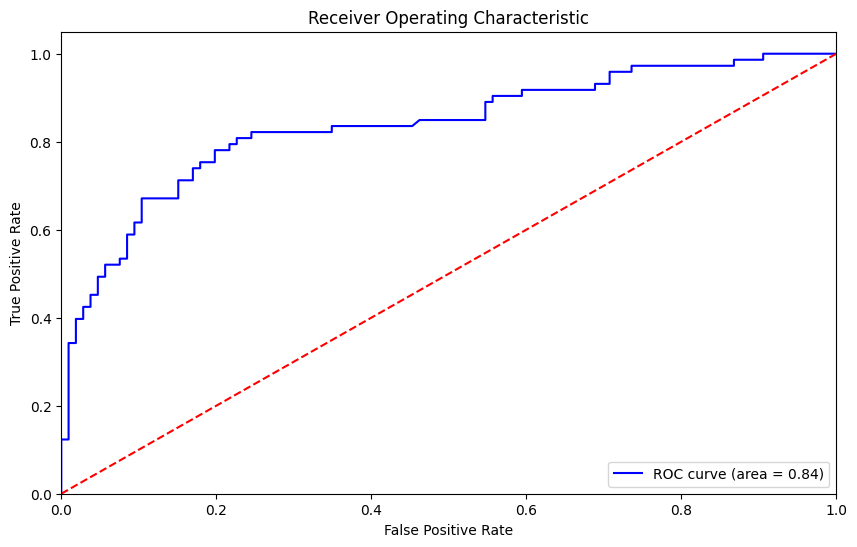

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()